<!--BOOK_INFORMATION-->
<img style="float: right; width: 100px" src="https://raw.github.com/pyomeca/design/master/logo/logo_cropped_doc.svg?sanitize=true">
<font size="+3">Effective computation in Biomechanics</font>

<font size="+2">Romain Martinez</font> <a href="https://github.com/romainmartinez"><img src="https://img.shields.io/badge/github-romainmartinez-green?logo=github&style=social" /></a>

<!--NAVIGATION-->
< [Introduction to musculoskeletal modelling](02.00-musculoskeletal-modelling.ipynb) | [Contents](index.ipynb) |

# Advanced Statistical Analysis of Biomechanical Time Series

## Statistical Parametric Mapping in Theory

Slides: [![Netlify Status](https://api.netlify.com/api/v1/badges/4244e50a-0d6c-4cb5-bdae-9e9974730f66/deploy-status)](https://mrtnz-stats.netlify.com/)

## Statistical Parametric Mapping in Practice

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spm1d

%load_ext lab_black

sns.set(style="ticks", context="talk")
maroon = "#800000"
blue = "#006eb8"

np.random.seed(42)

### Quick overview

In `spm1d`, statistical testing is performed in two stages:

1. Test statistic computation
2. Statistical inference

Let's see how the procedure works with random data

#### __Generate data__

In [2]:
observations = 10
nodes = 100

data = spm1d.rft1d.randn1d(observations, nodes)

In `spm1d`, we organize the data such as 
$$\text{observations (rows)} \times \text{nodes (columns)}$$

In [3]:
data.shape

(10, 100)

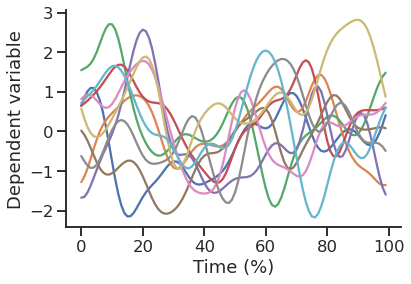

In [4]:
# we transpose the data because nodes should be on the first dimensions with matplotlib
plt.plot(data.T)

plt.ylabel("Dependent variable")
plt.xlabel("Time (%)")

sns.despine()

Mean and standard deviation can be visualized:

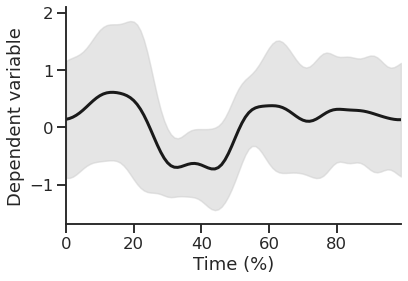

In [5]:
spm1d.plot.plot_mean_sd(data)

plt.ylabel("Dependent variable")
plt.xlabel("Time (%)")

sns.despine()

Let's divide our data into two groups and perform a t-test:

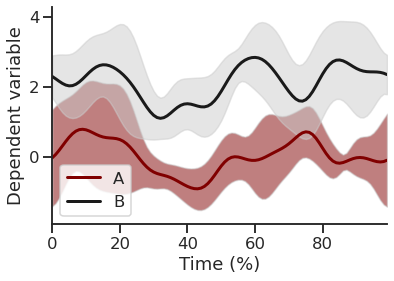

In [6]:
group_a = data[:5, :]
group_b = data[5:, :] + 2

spm1d.plot.plot_mean_sd(group_a, linecolor=maroon, facecolor=maroon, label="A")
spm1d.plot.plot_mean_sd(group_b, label="B")

plt.ylabel("Dependent variable")
plt.xlabel("Time (%)")
plt.legend()

sns.despine()

#### __Test statistic computation__

A two-sample t-test statistic can be computed as follows:

In [7]:
t = spm1d.stats.ttest2(group_a, group_b)

The test statistic can be visualized as follows:

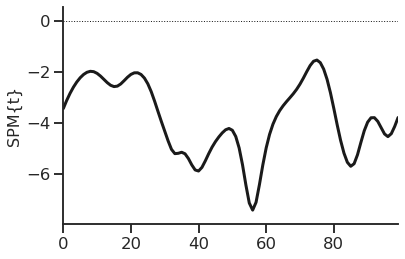

In [8]:
t.plot()
sns.despine()

Note that computing the test statistic does __not__ constitute statistical testing.
At this point we have conducted precisely zero statistical tests.

A statistical test is conducted only when we quantify the probability that random data would produce particular features of our test statistic.

#### __Statistical inference__

Now that we have the test statistic, we can conduct the statistical inference as follows:

In [9]:
ti = t.inference(alpha=0.05, two_tailed=True)

and can be visualized:

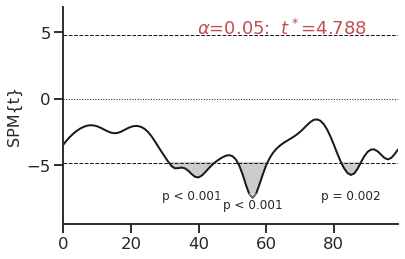

In [10]:
ti.plot()
ti.plot_threshold_label()
ti.plot_p_values(size=12, offset_all_clusters=(0, -2))

sns.despine()

In this plot:
    
- The black line depicts the test statistic ($t$ in this case)

- The red hashed line depicts the critical threshold at $\alpha = 0.05%$

    - From a classical hypothesis testing perspective, the null hypothesis is rejected at alpha if the SPM{t} exceeds this threshold.


- The $p$-value indicates the probability that __smooth__, random continua would produce a supra-threshold cluster as __broad__ as the observed cluster.
    
    - Here “smooth” means the same smoothness as the residual continua, and “broad” means the proportion of the continuum spanned by a suprathreshold cluster.

### How to pick a test?

1. How many variables? (dependent variables)

    - $1$: __Univariate__ test (T-test, ANOVA)

    - $> 1$: __Multivariate__ test (Hotelling T-test, MANOVA)
    
2. How many factors? (independent variables)

    - $1$ factor with $2$ levels: T-test, Hotelling T-test
    
    - $1$ factor with $> 2$ levels: one-way ANOVA, one-way MANOVA
    
    - $2$ factors with $> 2$ levels: two-rays ANOVA, two-ways MANOVA
    
    - $> 3$ factors: no.
    
3. What kind of sample?

    - same samples: __paired__ test
    
    - different samples: other test
    
<img src="img/stat-flow.svg">

Let's try with some real world examples:

1. The effect of a foot orthosis on knee contact forces

<details>
  <summary>Answer</summary>
    
  __paired t-test__ because we will probably test the same participants with and without the device  
</details>

2. The effect of violin expertise (2 levels) on the sum of shoulder muscle activations

<details>
  <summary>Answer</summary>
    
  __two sample t-test__ because we will probably test two populations
</details>

3. The effect of foot orthosis design (3 levels) on knee contact forces

<details>
  <summary>Answer</summary>
    
  __one-way ANOVA with repeated measures__ because we will probably test the same participants with three different designs
</details>

4. The effect of expertise (2 levels) and box weight (3 levels) on the glenohumeral contact forces during manual handling tasks

<details>
  <summary>Answer</summary>
    
  __two-ways ANOVA__ because we will probably test two different populations and we have two factors
</details>

4. The effect of a foot orthosis on ankle, knee and hip contact forces

<details>
  <summary>Answer</summary>
    
  __paired Hotelling's T2__ because we have multiple variables and we will probably test the same participants with and without the device
</details>

4. The effect of foot orthosis design (3 levels) on ankle, knee and hip contact forces

<details>
  <summary>Answer</summary>
    
  __one-way MANOVA__ because we have multiple variables and multiple levels
</details>

### Real world examples

__1. T-tests__

1.1 Paired T-test

> Caravaggi, P., Pataky, T., Günther, M., Savage, R., & Crompton, R. (2010). Dynamics of longitudinal arch support in relation to walking speed: contribution of the plantar aponeurosis. Journal of Anatomy, 217(3), 254–261. [DOI](http://doi.org/10.1111/j.1469-7580.2010.01261.x)

In [11]:
data = spm1d.data.uv1d.tpaired.PlantarArchAngle()
group_a, group_b = data.get_data()

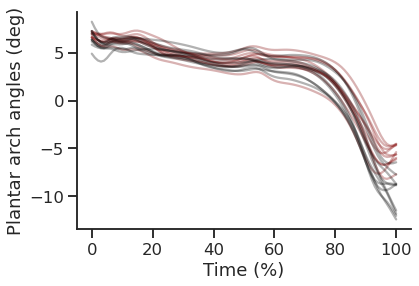

In [12]:
plt.plot(group_a.T, c=maroon, alpha=0.3)
plt.plot(group_b.T, c="black", alpha=0.3)

plt.ylabel("Plantar arch angles (deg)")
plt.xlabel("Time (%)")

sns.despine()

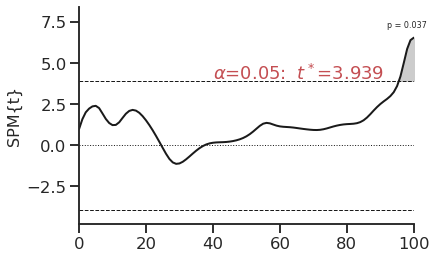

In [13]:
t = spm1d.stats.ttest_paired(group_a, group_b)
ti = t.inference(alpha=0.05, two_tailed=True)

ti.plot()
ti.plot_p_values(offset_all_clusters=(0, 2))
ti.plot_threshold_label()

sns.despine()

In [14]:
def plot_clusters(spmi, y=0, ax=None):
    if not spmi.h0reject:
        return

    ax = ax if ax else plt

    for cluster in spmi.clusters:
        ax.axvspan(
            cluster.endpoints[0], cluster.endpoints[1], facecolor="gray", alpha=0.3
        )
        ax.text(
            x=np.mean(cluster.endpoints),
            y=y,
            s=f"p = {cluster.P:.3f}",
            horizontalalignment="center",
        )

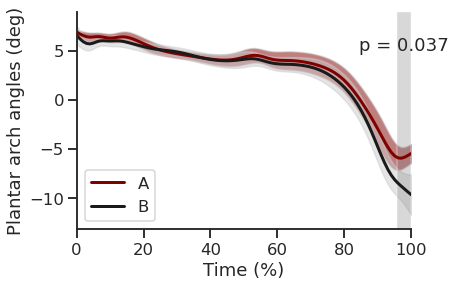

In [15]:
spm1d.plot.plot_mean_sd(group_a, linecolor=maroon, facecolor=maroon, label="A")
spm1d.plot.plot_mean_sd(group_b, label="B")

plt.ylabel("Plantar arch angles (deg)")
plt.xlabel("Time (%)")
plt.legend()

plot_clusters(ti, y=5)

sns.despine()

In [16]:
from IPython.display import display, HTML


def compute_cohen_d(a, b):
    d = (a.mean() - b.mean()) / (np.sqrt((a.std() ** 2 + b.std() ** 2) / 2))
    if np.abs(d) >= 0.8:
        effect = "large"
    elif np.abs(d) >= 0.5:
        effect = "medium"
    elif np.abs(d) >= 0.2:
        effect = "small"
    else:
        effect = "no"
    return d, effect


def describe_clusters(spmi, A, B):
    if not spmi.h0reject:
        return
    results = []
    for cluster in spmi.clusters:
        endpoints = [int(round(s)) for s in cluster.endpoints]

        A_subset = A[:, endpoints[0] : endpoints[1]]
        B_subset = B[:, endpoints[0] : endpoints[1]]

        d, d_label = compute_cohen_d(A_subset, B_subset)

        results.append(
            {
                "cluster_start": endpoints[0],
                "cluster_end": endpoints[1],
                "mean_difference": (A_subset - B_subset).mean().round(2),
                "std_difference": (A_subset - B_subset).std().round(2),
                "cohen_d": f"{d:.2f} [{d_label}]",
                "p": cluster.P,
            }
        )
    return display(HTML(pd.DataFrame(results).to_html()))


describe_clusters(ti, group_a, group_b)

,cluster_start,cluster_end,mean_difference,std_difference,cohen_d,p
0,96,100,3.11,1.8,2.36 [large],0.037295


Group A exhibits higher plantar arch angles than group B from 96 to 100% of the trial ($+3.11 \pm 1.80$ degrees, $\text{ES} = 2.36$ [large], $p = 0.037$)

1.2 Two samples T-test

> Caravaggi, P., Pataky, T., Günther, M., Savage, R., & Crompton, R. (2010). Dynamics of longitudinal arch support in relation to walking speed: contribution of the plantar aponeurosis. Journal of Anatomy, 217(3), 254–261. [DOI](http://doi.org/10.1111/j.1469-7580.2010.01261.x)

In [17]:
data = spm1d.data.uv1d.t2.SimulatedTwoLocalMax()
group_a, group_b = data.get_data()

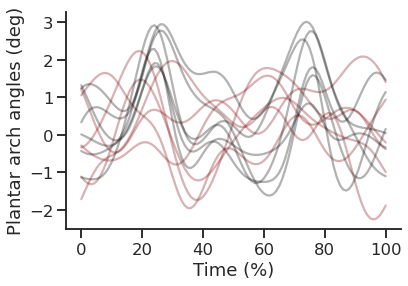

In [18]:
plt.plot(group_a.T, c=maroon, alpha=0.3)
plt.plot(group_b.T, c="black", alpha=0.3)

plt.ylabel("Plantar arch angles (deg)")
plt.xlabel("Time (%)")

sns.despine()

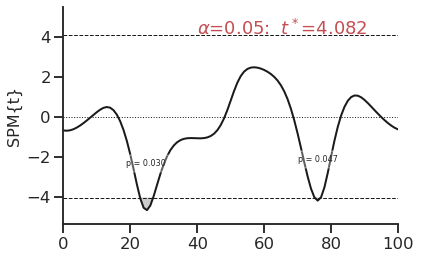

In [19]:
t = spm1d.stats.ttest2(group_a, group_b)
ti = t.inference(alpha=0.05, two_tailed=True)

ti.plot()
ti.plot_p_values(offset_all_clusters=(0, 2))
ti.plot_threshold_label()

sns.despine()

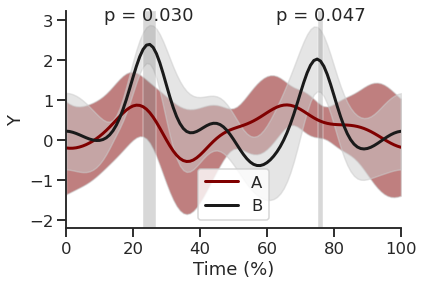

In [20]:
spm1d.plot.plot_mean_sd(group_a, linecolor=maroon, facecolor=maroon, label="A")
spm1d.plot.plot_mean_sd(group_b, label="B")

plt.ylabel("Y")
plt.xlabel("Time (%)")
plt.legend()

plot_clusters(ti, y=3)

sns.despine()

In [21]:
describe_clusters(ti, group_a, group_b)

,cluster_start,cluster_end,mean_difference,std_difference,cohen_d,p
0,23,27,-1.62,0.71,-2.78 [large],0.029937
1,75,77,-1.51,1.06,-2.60 [large],0.046577


Group A exhibits lower $Y$ than group B from 23 to 27% ($-1.62 \pm 0.71 Y$, $\text{ES} = 2.78$ [large], $p = 0.03$) and from 75 to 77% ($-1.51 \pm 1.06 Y$, $\text{ES} = 2.60$ [large], $p = 0.047$) of the trial.

__2. ANOVA__

2.1. One-way ANOVA

> Pataky, T. C., Caravaggi, P., Savage, R., Parker, D., Goulermas, J., Sellers, W., & Crompton, R. (2008). New insights into the plantar pressure correlates of walking speed using pedobarographic statistical parametric mapping (pSPM). Journal of Biomechanics, 41(9), 1987–1994. [DOI](https://www.ncbi.nlm.nih.gov/pubmed/18501364)

In [22]:
data = spm1d.data.uv1d.anova1.SpeedGRFcategorical()
Y, walk_speed = data.get_data()

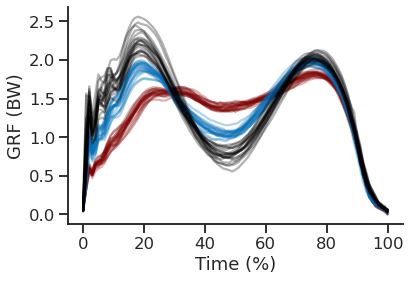

In [23]:
plt.plot(Y[walk_speed == 1].T, c=maroon, alpha=0.3, label="slow")
plt.plot(Y[walk_speed == 2].T, c=blue, alpha=0.3, label="normal")
plt.plot(Y[walk_speed == 3].T, c="black", alpha=0.3, label="fast")

plt.ylabel("GRF (BW)")
plt.xlabel("Time (%)")

sns.despine()

<ipython-input-24-7237ca18edc7>:1: UserWarning: 

  f = spm1d.stats.anova1(Y, walk_speed)


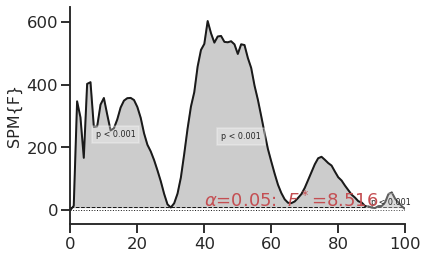

In [24]:
f = spm1d.stats.anova1(Y, walk_speed)
fi = f.inference(alpha=0.05)

fi.plot()
fi.plot_p_values(offset_all_clusters=(0, 2))
fi.plot_threshold_label()

sns.despine()

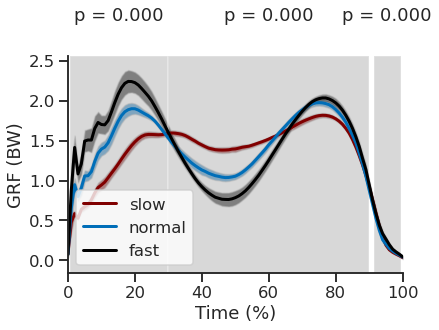

In [25]:
spm1d.plot.plot_mean_sd(
    Y[walk_speed == 1], linecolor=maroon, facecolor=maroon, label="slow"
)
spm1d.plot.plot_mean_sd(
    Y[walk_speed == 2], linecolor=blue, facecolor=blue, label="normal"
)
spm1d.plot.plot_mean_sd(
    Y[walk_speed == 3], linecolor="black", facecolor="black", label="fast"
)

plt.ylabel("GRF (BW)")
plt.xlabel("Time (%)")
plt.legend()

plot_clusters(fi, y=3)

sns.despine()

Post-hoc

In [26]:
def get_region_of_interest(spmi):
    region_of_interest = np.zeros(spmi.z.shape[0])
    for cluster in spmi.clusters:
        region_of_interest[
            int(round(cluster.endpoints[0])) : int(round(cluster.endpoints[1]))
        ] = 1
    return region_of_interest.astype(bool)

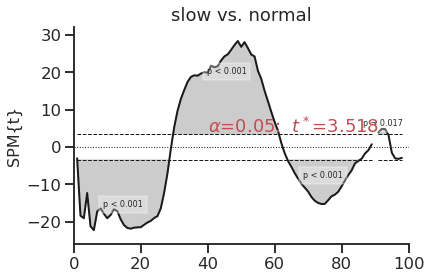

,cluster_start,cluster_end,mean_difference,std_difference,cohen_d,p
0,1,29,-0.36,0.16,-0.94 [large],0.000000
1,30,61,0.26,0.11,2.11 [large],0.000000
2,64,85,-0.12,0.07,-1.22 [large],0.000000
3,91,94,0.06,0.07,0.45 [small],0.016748


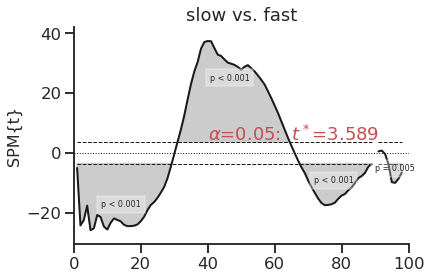

,cluster_start,cluster_end,mean_difference,std_difference,cohen_d,p
0,1,29,-0.67,0.25,-1.75 [large],0.000000
1,31,65,0.43,0.19,2.24 [large],0.000000
2,67,89,-0.16,0.08,-0.83 [large],0.000000
3,94,98,-0.06,0.04,-0.72 [medium],0.004971


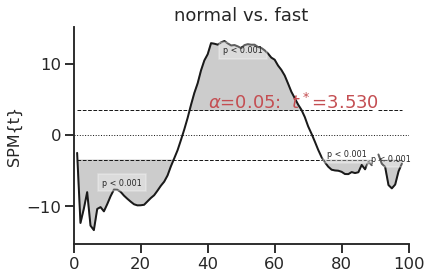

,cluster_start,cluster_end,mean_difference,std_difference,cohen_d,p
0,1,30,-0.30,0.18,-0.80 [medium],0.000000e+00
1,35,68,0.20,0.10,0.79 [medium],0.000000e+00
2,75,89,-0.08,0.05,-0.31 [small],4.640732e-14
3,92,98,-0.06,0.04,-0.37 [small],2.199202e-04


In [27]:
from itertools import combinations

cases = ["", "slow", "normal", "fast"]
for combination in combinations(np.unique(walk_speed), 2):
    A = Y[walk_speed == combination[0]]
    B = Y[walk_speed == combination[1]]

    t = spm1d.stats.ttest2(A, B, roi=get_region_of_interest(fi))
    ti = t.inference(alpha=0.05, two_tailed=True)

    ti.plot()
    ti.plot_p_values(offset_all_clusters=(0, 2))
    ti.plot_threshold_label()
    plt.title(f"{cases[combination[0]]} vs. {cases[combination[1]]}")

    sns.despine()
    plt.show()
    describe_clusters(ti, A, B)

__3. Multivariate tests__

3.1 Paired Hotelling T-test

> Neptune, R. R., Wright, I. C., & van den Bogert, A. J. (1999). Muscle coordination and function during cutting movements. Medicine & Science in Sports & Exercise, 31(2), 294–302. [DOI](https://www.ncbi.nlm.nih.gov/pubmed/10063820)

In [28]:
data = spm1d.data.mv1d.hotellings_paired.Neptune1999kneekin()
A, B = data.get_data()

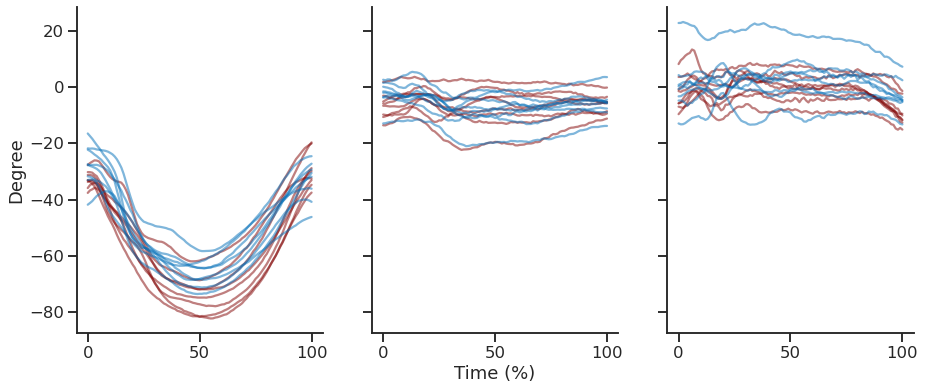

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharey=True)

for dof in range(A.shape[-1]):
    axes[dof].plot(A[..., dof].T, color=maroon, alpha=0.5, label="side-shuffle")
    axes[dof].plot(B[..., dof].T, color=blue, alpha=0.5, label="v-cut")

    if dof == 0:
        axes[dof].set_ylabel("Degree")
    elif dof == 1:
        axes[dof].set_xlabel("Time (%)")

sns.despine()

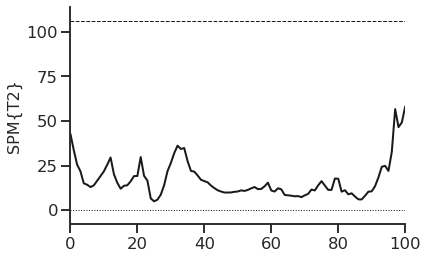

In [30]:
h = spm1d.stats.hotellings_paired(A, B)
hi = h.inference(alpha=0.05)

hi.plot()
sns.despine()

3.2. __Non-parametric__ Two sample Hotelling

> Besier, T. F., Fredericson, M., Gold, G. E., Beaupré, G. S., & Delp, S. L. (2009). Knee muscle forces during walking and running in patellofemoral pain patients and pain-free controls. Journal of Biomechanics, 42(7), 898–905. [DOI](http://doi.org/10.1016/j.jbiomech.2009.01.032)

In [31]:
data = spm1d.data.mv1d.hotellings2.Besier2009muscleforces()
A, B = data.get_data()

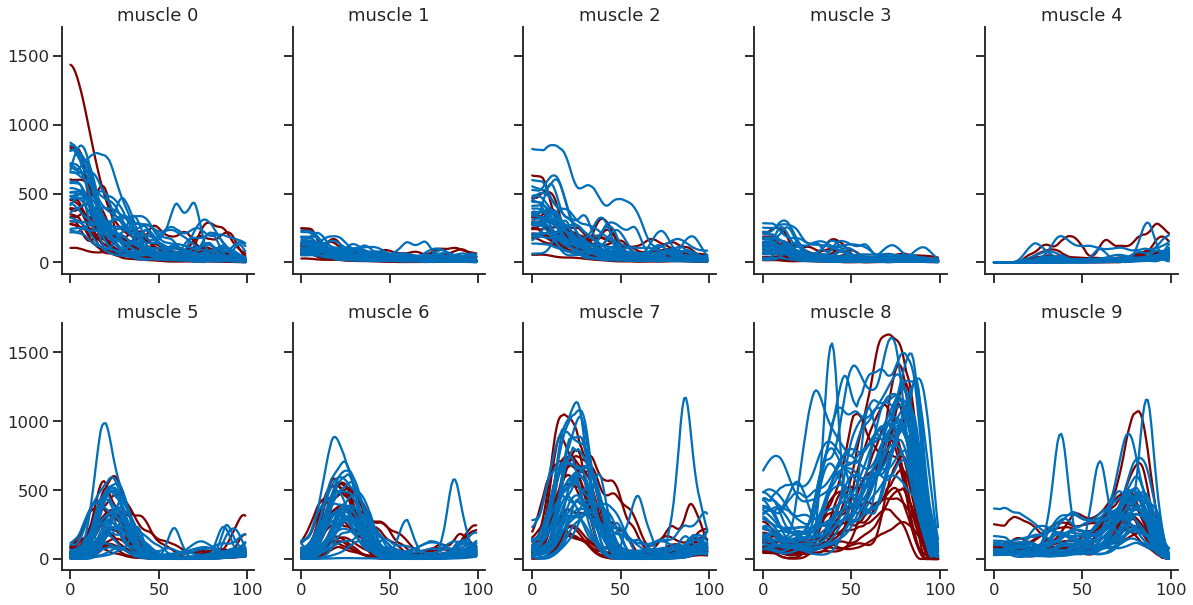

In [32]:
n_muscle = A.shape[-1]
wrap = 5

fig, axes = plt.subplots(
    nrows=n_muscle // wrap, ncols=wrap, figsize=(20, 10), sharex=True, sharey=True
)

for muscle in range(n_muscle):
    row = muscle // wrap
    col = muscle % wrap

    axes[row, col].plot(A[..., muscle].T, color=maroon)
    axes[row, col].plot(B[..., muscle].T, color=blue)
    axes[row, col].set_title(f"muscle {muscle}")

sns.despine()

We just have to add the `nonparam` keyword to perform a non-parametric test and specify a number of iterations:

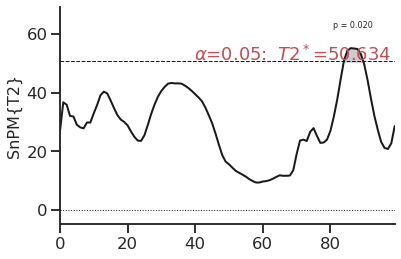

In [33]:
h = spm1d.stats.nonparam.hotellings2(A, B)
hi = h.inference(alpha=0.05, iterations=50)

hi.plot()
hi.plot_p_values(offset_all_clusters=(0, 10))
hi.plot_threshold_label()

sns.despine()

In [34]:
region_of_interest = get_region_of_interest(hi)
region_of_interest

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False])

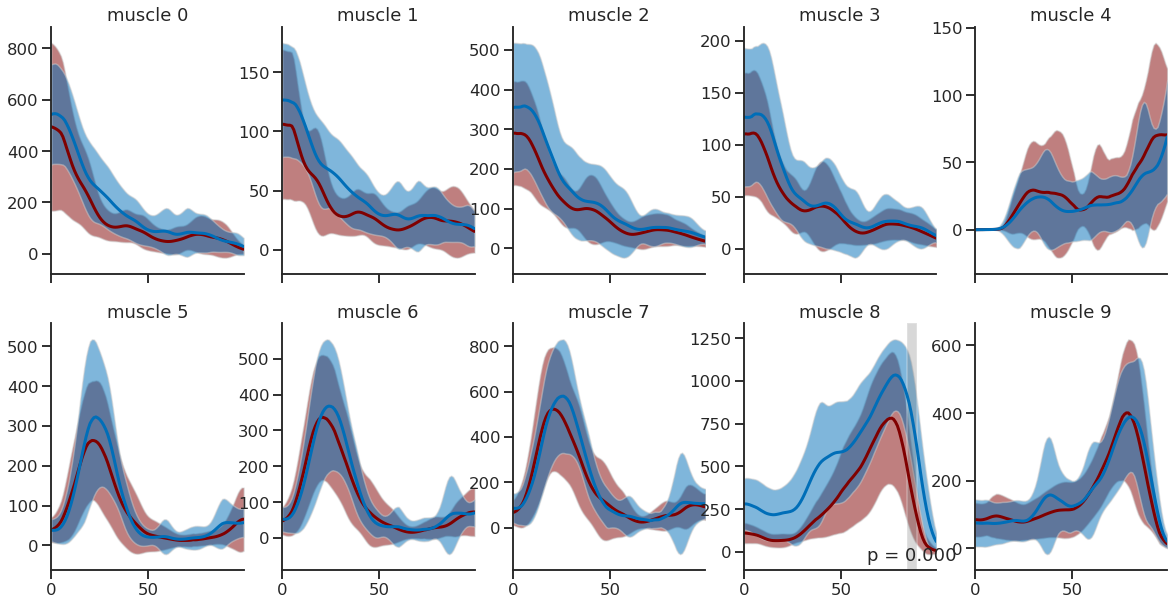

In [35]:
fig, axes = plt.subplots(
    nrows=n_muscle // wrap, ncols=wrap, figsize=(20, 10), sharex=True, sharey=False
)

for muscle in range(n_muscle):
    row = muscle // wrap
    col = muscle % wrap

    spm1d.plot.plot_mean_sd(
        A[..., muscle], ax=axes[row, col], linecolor=maroon, facecolor=maroon
    )
    spm1d.plot.plot_mean_sd(
        B[..., muscle], ax=axes[row, col], linecolor=blue, facecolor=blue
    )
    axes[row, col].set_title(f"muscle {muscle}")

    t = spm1d.stats.ttest2(A[..., muscle], B[..., muscle], roi=region_of_interest)
    ti = t.inference()

    plot_clusters(ti, ax=axes[row, col], y=-50)

sns.despine()

__4. 0D tests__

`spm1d` can also be used for 0D statistical inference

In [36]:
data = spm1d.data.mv0d.hotellings_paired.RSXLHotellingsPaired()
A, B = data.get_data()

In [37]:
h = spm1d.stats.nonparam.hotellings2(A, B)
hi = h.inference(iterations=1000)
hi

SnPM{T2} inference (0D)
   SPM.z              :  41.920
   SnPM.nPermUnique   :  1.264e+14 permutations possible
Inference:
   SnPM.nPermActual   :  1000 actual permutations
   SPM.alpha          :  0.050
   SPM.zstar          :  13.64505
   SPM.h0reject       :  True
   SPM.p              :  0.001

In [38]:
df = pd.concat(
    [
        pd.DataFrame(A).add_prefix("variable ").assign(Group="A"),
        pd.DataFrame(B).add_prefix("variable ").assign(Group="B"),
    ]
).melt(id_vars="Group")

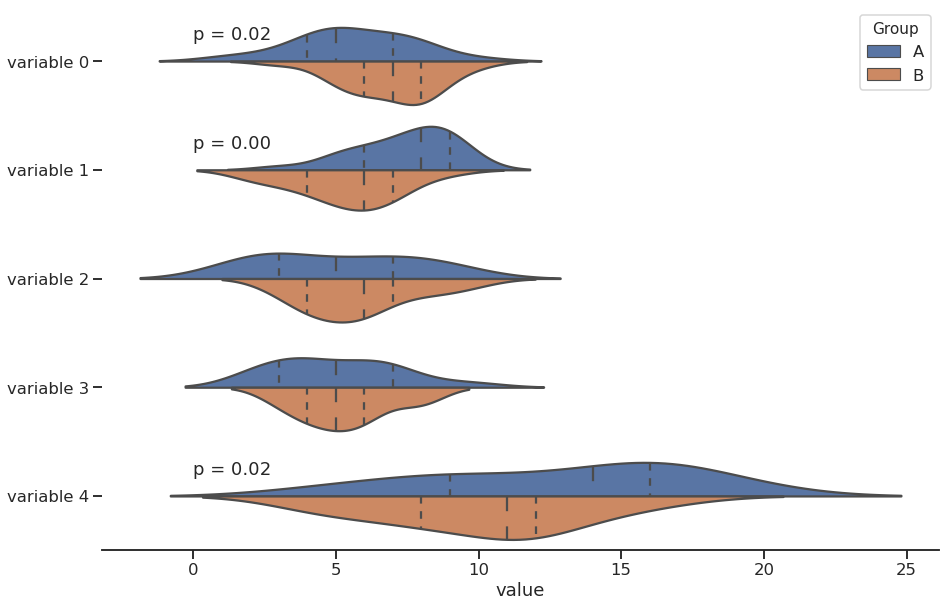

In [39]:
plt.figure(figsize=(15, 10))

sns.violinplot(
    y="variable", x="value", hue="Group", split=True, inner="quart", data=df,
)
plt.ylabel("")

for variable in range(A.shape[-1]):
    t = spm1d.stats.nonparam.ttest2(A[..., variable], B[..., variable])
    ti = t.inference(iterations=1000)
    if ti.h0reject:
        plt.text(x=0, y=variable - 0.2, s=f"p = {ti.p:.2f}")

sns.despine(left=True)

__5. nD tests__

See [spm1d.org tutorial](http://www.spm1d.org/doc/Stats2D/ex2d.html)

<!--NAVIGATION-->
< [Introduction to musculoskeletal modelling](02.00-musculoskeletal-modelling.ipynb) | [Contents](index.ipynb) |